<font size="12">Computational Physics: Final Project</font>

<font size="5">Tanya Shevchuk and Gali Shmueli</font>


In [1]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import h5py
import pandas
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from astroML.utils import completeness_contamination
from sklearn.metrics import log_loss



In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'train.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('dataFinal/train')
test  = load_data('dataFinal/test')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [4]:
X = train[all_variables]
y = train['Truth']

X_t = test[all_variables]

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

print (f'Shape of X_test: {X_t.shape}')

Shape of X: (162500, 160)
Shape of y: (162500,)
Shape of X_test: (160651, 160)


## Exercise 1.1

Let's use scikit-learn's feature selection tool to choose the 20 most important variables. This tool removes low variance features.

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)
X_new.shape

Selected Features:
['p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_E7x7_Lr3', 'p_E_Lr3_HiG', 'p_e2ts1', 'p_ethad', 'p_ethad1', 'p_f3core', 'p_r33over37allcalo', 'p_e2tsts1', 'p_ehad1', 'p_DeltaE', 'p_E3x5_Lr3', 'p_E5x7_Lr3', 'p_E7x11_Lr3']


/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 67  73  76 101 113 119 122 128 131 136] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(162500, 20)

In [6]:
X_t1 = X_t[selected_feature_names]

In [7]:
sc = StandardScaler()
Xs = sc.fit_transform(X_new)
Xs_t1 = sc.fit_transform(X_t1)

X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)
X_train.shape

(130000, 20)

# Random forest:

In [8]:
# Classification using Desicion tree (output is 0,1 not float)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.908


In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best MSE Score:", -grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Best MSE Score: 0.08333076923076924


In [10]:
print(grid_search.best_params_)

bestclf = grid_search.best_estimator_
bestclf.fit(X_train, y_train)
y_pred = bestclf.predict(X_val)

{'max_depth': 10, 'n_estimators': 100}


In [12]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

loss = log_loss(y_val, y_pred)
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

Accuracy: 0.9160307692307692
Log Loss / Cross Entropy = 3.0266


# TensorFlow

In [264]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

tf.random.set_seed(21)
model_tf = Sequential()

model_tf.add(Dense(100, activation='relu', input_shape=(X_new.shape[1],)))
model_tf.add(Dense(50, activation='relu'))
model_tf.add(Dense(1, activation='relu'))

model_tf.compile(optimizer='adam', loss='binary_crossentropy')

model_tf.fit(X_train, y_train, epochs=10, batch_size=32)

y_pred = model_tf.predict(X_val)

# Convert predictions to binary values (0 or 1)
y_pred_binary = np.round(y_pred).flatten()


accuracy = accuracy_score(y_val, y_pred_binary)
print("Accuracy:", accuracy)

completeness, contamination = completeness_contamination(y_pred_binary, y_val)

print("completeness", completeness)
print("contamination", contamination)

Epoch 1/10
4063/4063 [==============================] - 6s 1ms/step - loss: 0.4371
Epoch 2/10
4063/4063 [==============================] - 5s 1ms/step - loss: 0.3459
Epoch 3/10
4063/4063 [==============================] - 6s 1ms/step - loss: 0.3216
Epoch 4/10
4063/4063 [==============================] - 5s 1ms/step - loss: 0.2970
Epoch 5/10
4063/4063 [==============================] - 7s 2ms/step - loss: 0.3344
Epoch 6/10
4063/4063 [==============================] - 6s 2ms/step - loss: 0.3119
Epoch 7/10
4063/4063 [==============================] - 12s 3ms/step - loss: 0.3092
Epoch 8/10
4063/4063 [==============================] - 10s 3ms/step - loss: 0.3293
Epoch 9/10
4063/4063 [==============================] - 8s 2ms/step - loss: 0.3782
Epoch 10/10
1016/1016 [==============================] - 1s 905us/step
Accuracy: 0.9147692307692308
completeness 0.9908095023181389
contamination 0.09537366548042704


In [249]:
loss = log_loss(y_val, y_pred)
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))


Log Loss / Cross Entropy = 0.3441


# MLP:

In [250]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(5, 5), activation='relu', solver='adam', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9154769230769231


(0.9, 1.0)

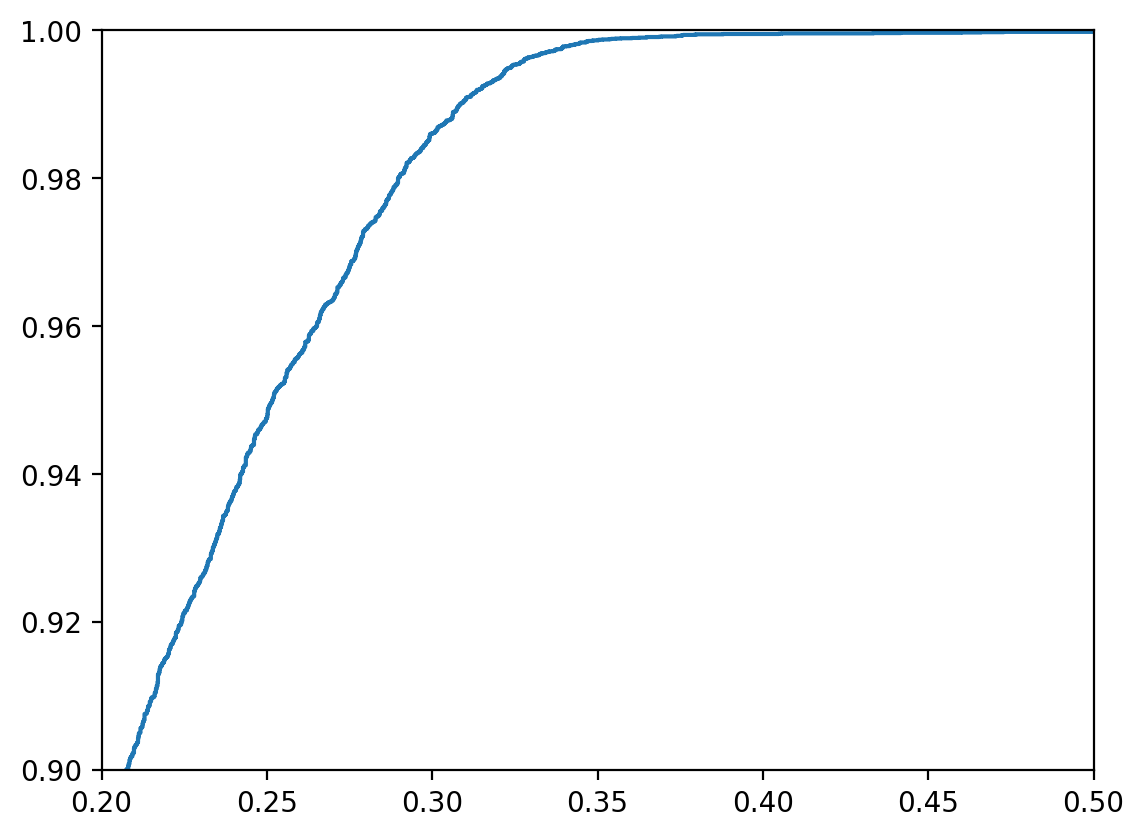

In [252]:
y_prob=clf.predict_proba(X_val)[:,1]
fpr, tpr, thresh = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr)
plt.xlim(0.2,0.5)
plt.ylim(0.9,1)

In [253]:
completeness, contamination = completeness_contamination(y_pred, y_val)

print("completeness", completeness)
print("contamination", contamination)

completeness 0.9907274443031223
contamination 0.09453277336133194


In [28]:
# Performing Cross-Validation to find the best hyperparameters.

parameters={
    'learning_rate': ["constant", "invscaling", "adaptive"],
    'learning_rate_init': [0.001, 0.005, 0.05, 0.1],
    'hidden_layer_sizes': [(5, 5),(6, 6),(7, 7)],
    'max_iter': [300,500,1000],
    'activation':  ['logistic','relu','tanh'],
    'batch_size': [16, 32, 64, 128, 256]
}

gscv = GridSearchCV(MLPClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=5)

gscv.fit(X_train, y_train)
gscv.best_params_

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  36.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  28.2s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  32.2s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  31.4s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=  24.6s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=  14.4s
[CV]

[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  44.7s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  27.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  17.2s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  19.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  31.0s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=  20.8s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5)

[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  20.7s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  41.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  30.0s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  32.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  23.4s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=  26.6s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5)

[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  35.5s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  34.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  24.8s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  30.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=  18.9s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=  20.9s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5)

[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  45.0s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  41.2s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  33.8s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  32.2s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=  15.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=  14.2s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), 

[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  46.4s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  22.2s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  40.9s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  12.4s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  14.8s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=  21.6s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), l

[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  36.3s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  26.6s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  45.5s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  26.5s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=  30.4s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=  21.0s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5),

[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  45.6s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  25.4s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  32.6s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  33.6s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=  16.1s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=  41.7s
[CV] END activation=logistic, batch_size=16, hidden_layer_sizes=(5, 5),

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=  12.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=  15.4s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  29.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  24.3s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  32.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  32.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=  39.0s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=  26.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=  15.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   9.7s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=  21.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  34.0s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=  20.0s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=  11.5s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=  20.7s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  36.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  36.4s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  31.3s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6,

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=  10.4s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=  17.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=  20.4s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  22.5s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  28.3s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  26.4s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=  19.7s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  46.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  30.9s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  41.4s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=  14.5s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=  13.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6),

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  46.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  25.9s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  30.0s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=  28.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  22.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  24.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(7, 7), l

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  19.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  27.1s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  40.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=  29.5s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=   8.9s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  17.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(7, 7), 

[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=  10.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=  16.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  20.2s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  19.1s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  41.3s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  40.6s
[CV] END activation=logistic, batch_size=32, hidden_layer_sizes=(7, 7), le

[CV] END activation=logistic, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  14.9s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=   8.3s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  14.7s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=   8.4s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  11.2s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   5.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=

[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  13.4s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  15.0s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  15.2s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  15.3s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   5.9s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   5.5s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=

[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   8.6s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   6.4s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   3.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=  13.6s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=  11.9s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=   9.4s
[CV] END activation=logistic, batch_size=128, hidden_layer_s

[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=  11.2s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=  12.5s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   6.5s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   3.7s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=   7.4s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  14.5s
[CV] END activation=logistic, batch_size=128, hidden_lay

[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   3.4s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   4.2s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=  13.7s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=  14.7s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=   8.5s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   5.9s
[CV] END activation=logistic, batch_size=128, hidden_layer_s

[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=   4.9s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=   3.8s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=   7.2s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=   3.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=   3.3s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=   4.7s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(5, 5),

[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=   9.4s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=  12.5s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=   4.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   9.0s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=   7.1s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=   8.1s
[CV] END activation=logistic, batch_size=128, hidden_lay

[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=  10.9s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=   9.8s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=  16.7s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=   8.6s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   5.9s
[CV] END activation=logistic, batch_size=128, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   3.9s
[CV] END activation=logistic, batch_size=128, hidden

[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=   4.6s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=   9.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   4.2s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   4.3s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   3.2s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   3.3s
[CV] END activation=logistic, batch_size=256, hidden_lay

[CV] END activation=relu, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  54.2s
[CV] END activation=relu, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=  56.0s
[CV] END activation=relu, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  21.4s
[CV] END activation=relu, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  19.2s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  26.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  36.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learn

[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=   4.6s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=   6.7s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=   8.2s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=   9.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=   8.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   6.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(

[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=   6.5s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=   9.7s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=   5.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   4.9s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   3.0s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   3.4s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7

[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=   3.5s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=   4.2s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=   9.4s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=   8.8s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=   6.0s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=   9.4s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(

[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=   7.6s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=   6.7s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=   9.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   3.9s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=   4.8s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   3.4s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7

[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=   4.7s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=   7.6s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=   3.5s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=   2.6s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=   8.7s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=   7.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7

[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=   6.9s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  11.4s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   6.7s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   4.2s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   7.1s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=   9.5s
[CV] END activation=logistic, batch_size=256, hidden_layer_sizes

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=  29.7s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=  26.0s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=  27.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=  15.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=  17.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=  12.3s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=i

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  25.8s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  52.7s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=  11.2s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  12.0s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=  11.3s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  15.1s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=constant, learning

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  29.2s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  27.2s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  49.6s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  17.7s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  20.0s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  43.6s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=constant, lea

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=  24.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=  10.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  14.2s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=  14.6s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  30.6s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  44.3s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=constant, learni

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=  12.8s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=  18.2s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  25.2s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  44.0s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  29.4s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  27.1s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, 

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=  20.9s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=  10.4s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=  10.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=  11.0s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=  38.1s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=  30.9s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, le

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  32.5s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  26.9s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  29.7s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=  11.8s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=  10.6s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  10.4s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, lea

[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  31.7s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=  16.1s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=  13.1s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=  21.0s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=  10.4s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  17.9s
[CV] END activation=relu, batch_size=32, hidden_layer_sizes=(6, 6), learning_rate=constant, learnin

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  38.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  43.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=  10.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=  10.5s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=  22.1s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=  33.7s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling,

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   9.0s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   7.5s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=  35.3s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=  16.2s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=  26.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=  20.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invsc

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=  10.7s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=   9.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  29.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  24.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  23.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  33.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=   8.3s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=  12.8s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=   7.3s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  28.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  38.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  21.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive,

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   8.8s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   6.2s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=   7.1s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  16.8s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  23.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  28.3s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, 

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=  16.2s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   8.1s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=  36.0s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=  29.0s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=  17.2s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=  20.2s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invsc

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=  10.3s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=  10.1s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=   6.5s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=  10.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  27.4s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  26.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptiv

[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   7.8s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=   6.1s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=   8.0s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  31.9s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  44.6s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  21.2s
[CV] END activation=relu, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=adaptive, 

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=   5.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=   9.7s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=   5.3s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   6.0s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   3.3s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   3.0s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=   9.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=   7.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=   2.7s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   5.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   2.5s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   2.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant,

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=   3.3s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=   6.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=   5.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=   6.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=   6.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   4.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constan

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=   5.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=   6.0s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=   8.7s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=   7.2s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   3.6s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   3.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscali

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   3.7s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=   7.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=  10.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=   6.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   4.5s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=   4.9s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_r

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   4.5s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=   8.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=   6.3s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=   7.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   5.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=   3.9s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rat

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   2.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   6.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   9.6s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=   7.2s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=   7.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=   7.8s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=

[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=   8.9s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   6.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   3.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   2.4s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=   6.6s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=   5.1s
[CV] END activation=relu, batch_size=256, hidden_layer_sizes=(6, 6), learning_rate=inv

[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=  18.2s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time= 1.1min
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time= 1.1min
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  57.2s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time= 1.1min
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=  17.9s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, lea

[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  47.2s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  38.3s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=  19.7s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=  19.3s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=  18.6s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  23.1s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, lear

[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  29.2s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  24.0s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  18.2s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  29.8s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  10.4s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=  16.9s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, lea

[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=  19.9s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=  19.3s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=  18.7s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  23.6s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  24.4s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  24.8s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learn

[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  36.6s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  19.3s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=   9.5s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=   9.7s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=  12.5s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   9.2s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learn

[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  10.3s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=300; total time=  10.3s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=   9.5s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   9.8s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=500; total time=   9.2s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   9.7s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learni

[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time= 1.4min
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  56.2s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time= 1.3min
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  19.5s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=  18.6s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  39.3s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, lear

[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=  18.6s
[CV] END activation=tanh, batch_size=16, hidden_layer_sizes=(7, 7), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=  19.0s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=  55.0s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  34.9s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  38.5s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   8.9s
[CV] END activation=tanh, batch_size=32, hidden_layer_sizes=(5, 5), learning_rate=constant, learni

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   5.4s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=500; total time=  23.5s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=  26.4s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=  17.2s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=  17.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=   8.6s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=in

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=   6.3s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  20.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  19.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  15.2s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  11.7s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  14.5s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive,

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  14.4s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=   6.8s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=   5.3s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=   5.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=   5.0s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  20.5s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learnin

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  21.5s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  11.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  15.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=   5.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=300; total time=   5.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=   6.4s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, lear

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  23.2s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  29.7s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=500; total time=  29.7s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=   6.5s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=500; total time=   5.5s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=   5.3s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, lear

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=   5.8s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=1000; total time=   5.6s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=300; total time=   5.7s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.1, max_iter=1000; total time=   5.4s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  26.3s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=300; total time=  15.0s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learni

{'activation': 'tanh',
 'batch_size': 16,
 'hidden_layer_sizes': (7, 7),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 500}

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=   6.4s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=  20.2s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.001, max_iter=500; total time=  16.8s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=  19.8s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.005, max_iter=1000; total time=  18.2s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500; total time=   6.6s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(6, 6), learning_rate=adaptive, l

[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=  10.6s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=   7.8s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=   9.8s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   2.1s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=   3.6s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   3.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_

[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=500; total time=   8.0s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=   6.9s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  13.7s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=500; total time=   2.3s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   2.7s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   2.5s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constan

[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=   7.3s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=   8.8s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=   6.1s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=  10.3s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   3.1s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=   2.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learnin

[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=500; total time=   8.8s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   2.7s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=1000; total time=   2.7s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   2.1s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=500; total time=   2.2s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=   8.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=

[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=300; total time=  24.7s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.001, max_iter=1000; total time=  24.0s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=500; total time=  14.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.005, max_iter=1000; total time=  22.9s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.05, max_iter=1000; total time=   6.1s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, learning_rate_init=0.1, max_iter=300; total time=   5.8s
[CV] END activation=tanh, batch_size=64, hidden_layer_sizes=(7, 7), learning_rate=constant, le

[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=constant, learning_rate_init=0.1, max_iter=1000; total time=   2.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=300; total time=   8.3s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.001, max_iter=1000; total time=   6.0s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=300; total time=   5.5s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1000; total time=   5.5s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=300; total time=   2.3s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_

[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.05, max_iter=500; total time=   3.4s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=300; total time=   2.5s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=invscaling, learning_rate_init=0.1, max_iter=1000; total time=   2.2s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=300; total time=   8.9s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.001, max_iter=1000; total time=  10.1s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=adaptive, learning_rate_init=0.005, max_iter=300; total time=   6.9s
[CV] END activation=tanh, batch_size=256, hidden_layer_sizes=(5, 5), learning_rate=ad

In [30]:
print(gscv.best_params_)

bestclf = gscv.best_estimator_
bestclf.fit(X_train, y_train)
y_prob=bestclf.predict_proba(X_val)[:,1]


{'activation': 'tanh', 'batch_size': 16, 'hidden_layer_sizes': (7, 7), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500}


(0.9, 1.0)

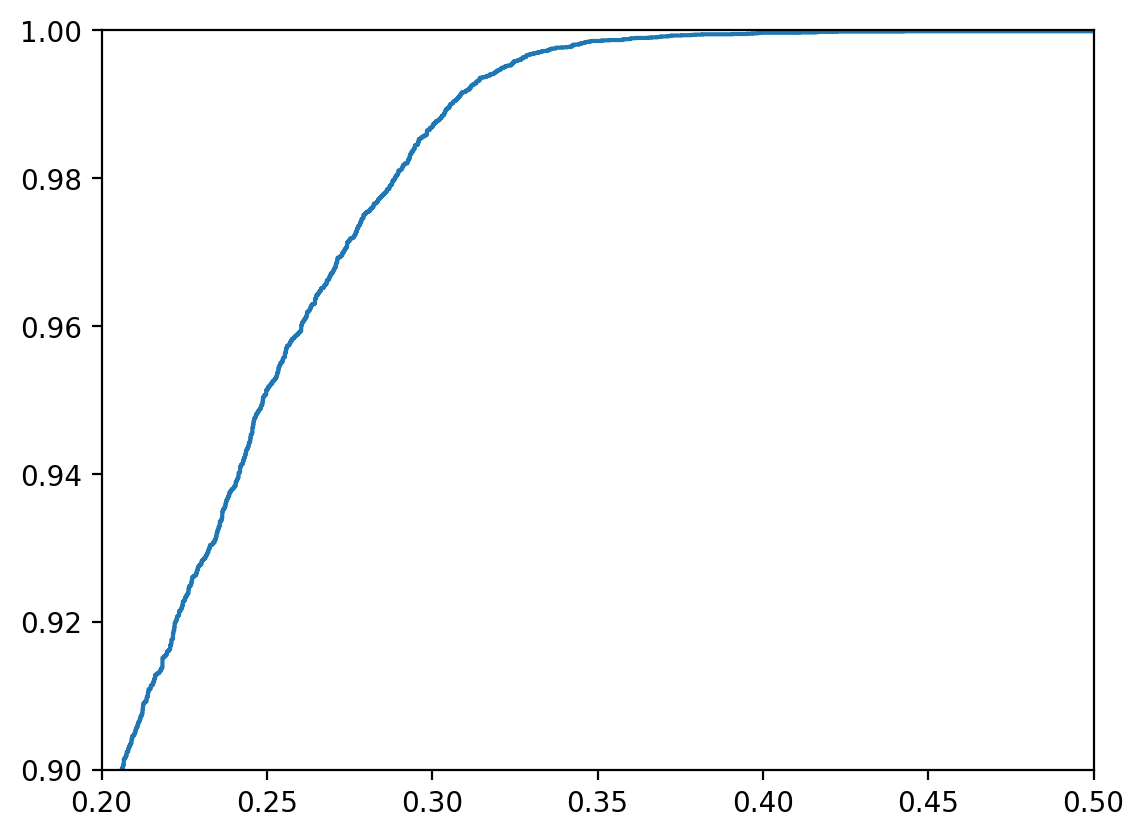

In [34]:
fpr, tpr, thresh = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr)
plt.xlim(0.2,0.5)
plt.ylim(0.9,1)

In [31]:
y_pred = bestclf.predict(X_val)
# Convert predictions to binary values (0 or 1)
y_pred_binary = np.round(y_pred).flatten()

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

completeness, contamination = completeness_contamination(y_pred, y_val)

print("completeness", completeness)
print("contamination", contamination)

Accuracy: 0.9164
completeness 0.9924916916259796
contamination 0.0948211345606945


In [32]:
loss = log_loss(y_val, y_pred)
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))


Log Loss / Cross Entropy = 3.0132


**Conclusions:**

RandomForest - after CV, still not very good results and high log_loss.

Keras - we got a very good value of log_loss function and slightly lower accuracy (and completeness). It was done without CV (only manually changing the hyhperparameters).

MLP - higher log_loss (which is bad) and slightly higher accuracy+completeness, and it was after extensive CV (although from the start the results were very good so no CV was really needed).

Overall, we can conclude that Keras is doing a better job for the classification.


## Exercise 1.2

In [13]:
X2 = X[y==1]
y2 = train['p_truth_E']
y2 = y2[y==1]


In [14]:
print(X2.shape)
print(y2.shape)

(121495, 160)
(121495,)


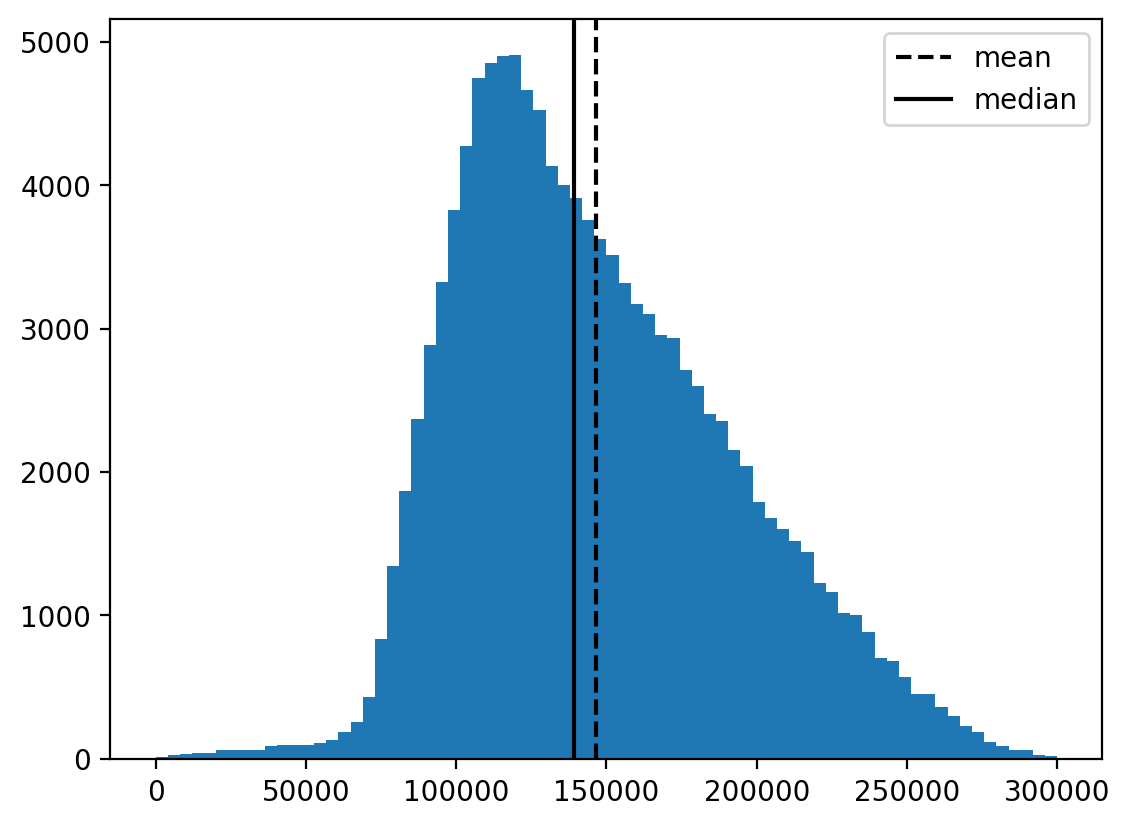

In [15]:
_ = plt.hist(y2, bins=np.linspace(0,300000,75))
plt.axvline(np.mean(y2), color='black', ls='--', label='mean')
plt.axvline(np.median(y2), color='black', label='median')
plt.legend()

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

selector_reg = SelectKBest(f_classif, k=12)
X_new2 = selector_reg.fit_transform(X2, y2)

# Get the indices of the selected features
selected_feature_indices = selector_reg.get_support(indices=True)

# Get the names of the selected features
selected_feature_names_reg = [X2.columns[i] for i in selected_feature_indices]

print("Selected Features:")
print(selected_feature_names_reg)
X_new2.shape

Selected Features:
['p_pt_track', 'p_eCluster', 'p_rawECluster', 'p_deltaPhiRescaled2', 'p_chi2', 'p_E_Lr0_MedG', 'p_E_Lr1_LowG', 'p_deltaEta3', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_LowG']


/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 67  68  70  73  76  77 101 113 114 116 119 122 123 128 131 136] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(121495, 12)

In [18]:
sc = StandardScaler()
Xs = sc.fit_transform(X_new2)

X_train2, X_val2, y_train2, y_val2 = train_test_split(Xs, y2, test_size=0.2, random_state=42)
X_train2.shape


(97196, 12)

# Random forest:

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, random_state=21)
model.fit(X_train2, y_train2)

RandomForestRegressor(n_estimators=50, random_state=21)

In [20]:
y_pred2 = model.predict(X_val2)

In [21]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val2, y_pred2)
print(mae)

7277.244716127118


In [25]:
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 5, 10]}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best MAE Score:", -grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 25}
Best MSE Score: 0.13896694249669544


In [26]:
print(grid_search.best_params_)

bestclf = grid_search.best_estimator_
bestclf.fit(X_train, y_train)
y_pred = bestclf.predict(X_val)

{'max_depth': 10, 'n_estimators': 25}


In [27]:
mae = mean_absolute_error(y_val2, y_pred2)
print(mae)

7277.244716127118


# MLP:

In [190]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50, 10), activation='relu', random_state=42)
model.fit(X_train2, y_train2)


MLPRegressor(hidden_layer_sizes=(100, 50, 10), random_state=42)

In [191]:
y_pred2 = model.predict(X_val2)


In [195]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val2, y_pred2)
print("R2:", r2)

Accuracy: 0.8738148378347584


In [196]:
mae = mean_absolute_error(y_val2, y_pred2)
print(mae)

6647.774139894725


# TensorFlow:

In [265]:
import tensorflow as tf

tf.random.set_seed(21)

model_tf_reg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train2.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)])

model_tf_reg.compile(optimizer='adam', loss='mean_absolute_error')


In [266]:
model_tf_reg.fit(X_train2, y_train2, epochs=10, batch_size=64)

Epoch 1/10
1519/1519 [==============================] - 3s 1ms/step - loss: 122999.6953
Epoch 2/10
1519/1519 [==============================] - 3s 2ms/step - loss: 27909.7148
Epoch 3/10
1519/1519 [==============================] - 4s 2ms/step - loss: 8029.7588
Epoch 4/10
1519/1519 [==============================] - 4s 3ms/step - loss: 6872.9097
Epoch 5/10
1519/1519 [==============================] - 2s 2ms/step - loss: 6640.7456
Epoch 6/10
1519/1519 [==============================] - 2s 1ms/step - loss: 6536.8335
Epoch 7/10
1519/1519 [==============================] - 2s 2ms/step - loss: 6480.9375
Epoch 8/10
1519/1519 [==============================] - 3s 2ms/step - loss: 6449.8462
Epoch 9/10
1519/1519 [==============================] - 3s 2ms/step - loss: 6434.2446
Epoch 10/10
1519/1519 [==============================] - 3s 2ms/step - loss: 6427.0327


In [267]:
y_pred2 = model_tf_reg.predict(X_val2)

760/760 [==============================] - 1s 1ms/step


In [228]:
r2 = r2_score(y_val2, y_pred2.T[9])
print("R2:", r2)

Accuracy: 0.8954729197905756


In [226]:
mae = mean_absolute_error(y_val2, y_pred2.T[-1])
print(mae)

6427.053993068422


For the MAE - we can see the mean absolute error is lower using Keras model, as expected from the first exercise (highest for RandomForest).

The values for the MAE are around 7,000, which is a reasonable value for our specific problem and in the context of our work. That is, from the histogram we plotted, it is evident that the mean energy is around 150,000 Gev and so an average deviation of our prediction from the true value of 7,000 is not that bad. Moreover, there is a wide range of samples and a lot of outliers that can effect the MAE value (for samples of energy 300,000 Gev, deviation of 7000 or more is not that bad).

We performed CV for the hyperparameters for the RandomForestRegressor, but for the MLP and Tensorflow regressor we performed the CV manually.

In addition, instead of using 'accuracy' to rank our model we used 'r2_score' which is compatible for continous values.

## Exercise 1.3

We'll use here 8 parameters of the first set of parameters chosen for exercise 1.1, since we want the clusters to divide between electrons and non-electrons.

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

selector_clust = SelectKBest(f_classif, k=8)
X_new = selector_clust.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector_clust.get_support(indices=True)

# Get the names of the selected features
selected_feature_names_clust = [X.columns[i] for i in selected_feature_indices]

print("Selected Features:")
print(selected_feature_names_clust)

sc = StandardScaler()
Xs = sc.fit_transform(X_new)

Selected Features:
['p_weta2', 'p_Reta', 'p_Rphi', 'p_Rhad', 'p_Rhad1', 'p_ethad', 'p_ethad1', 'p_ehad1']


/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 67  73  76 101 113 119 122 128 131 136] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [236]:
!pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


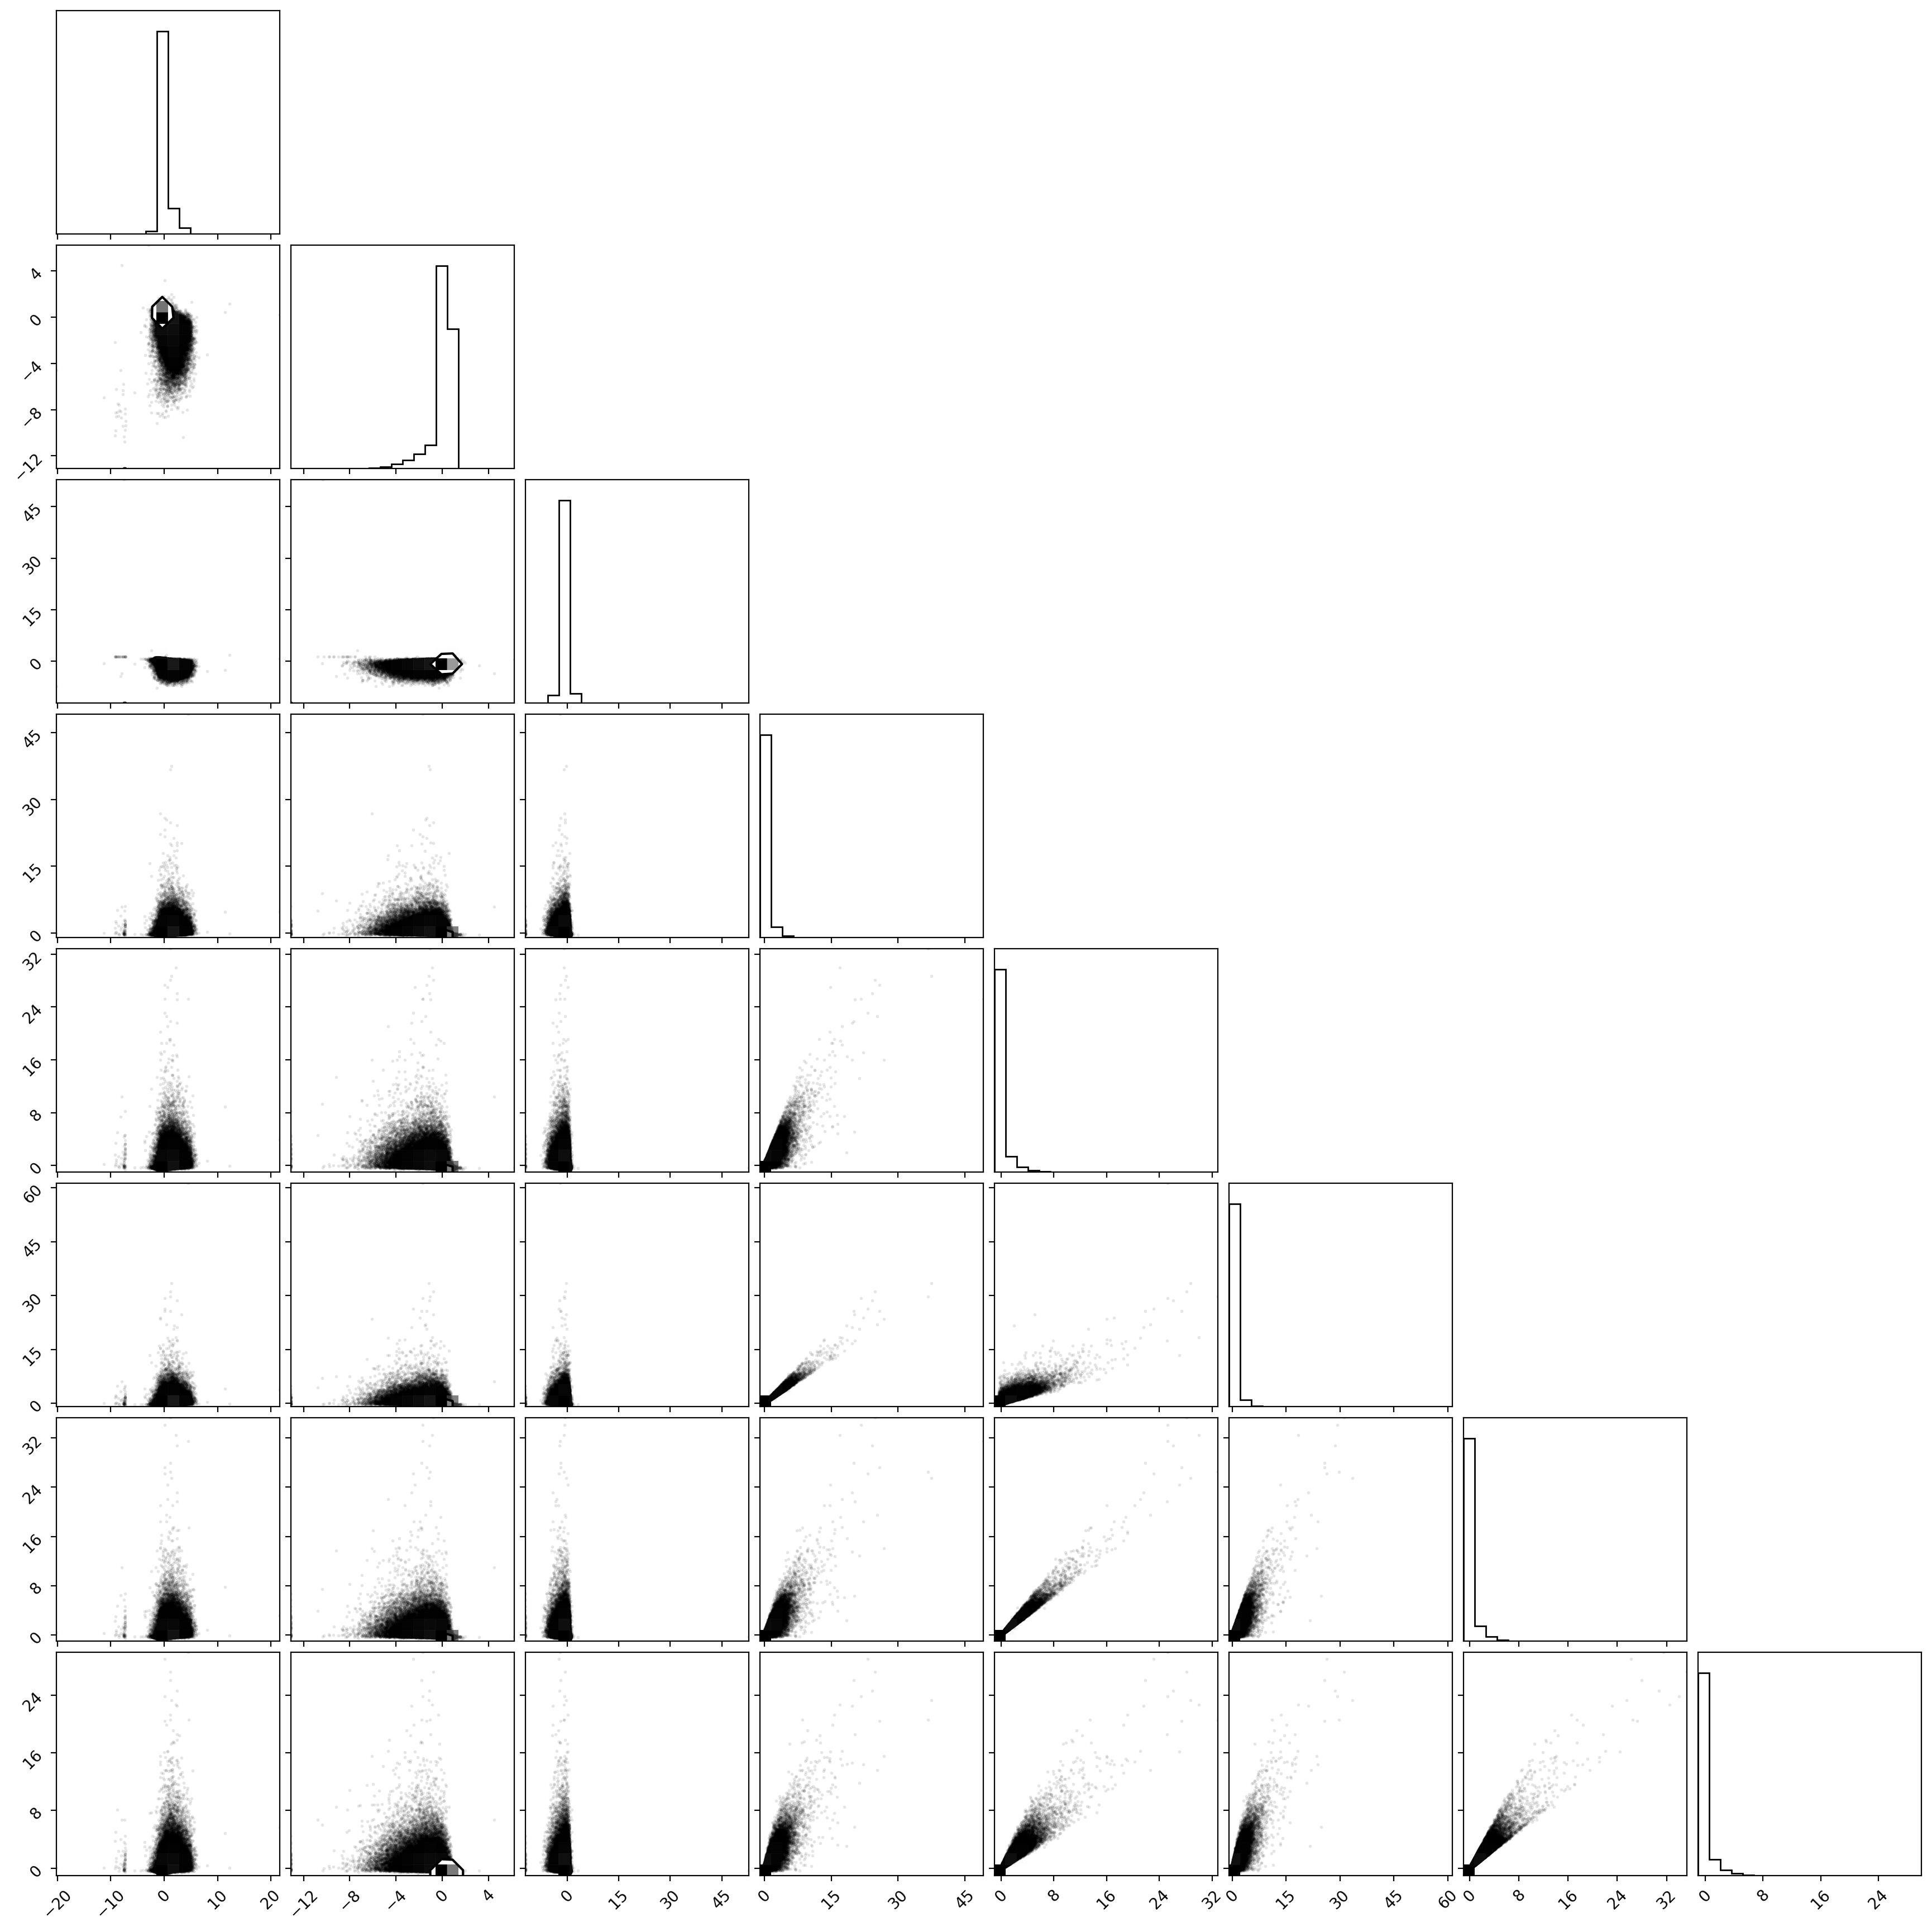

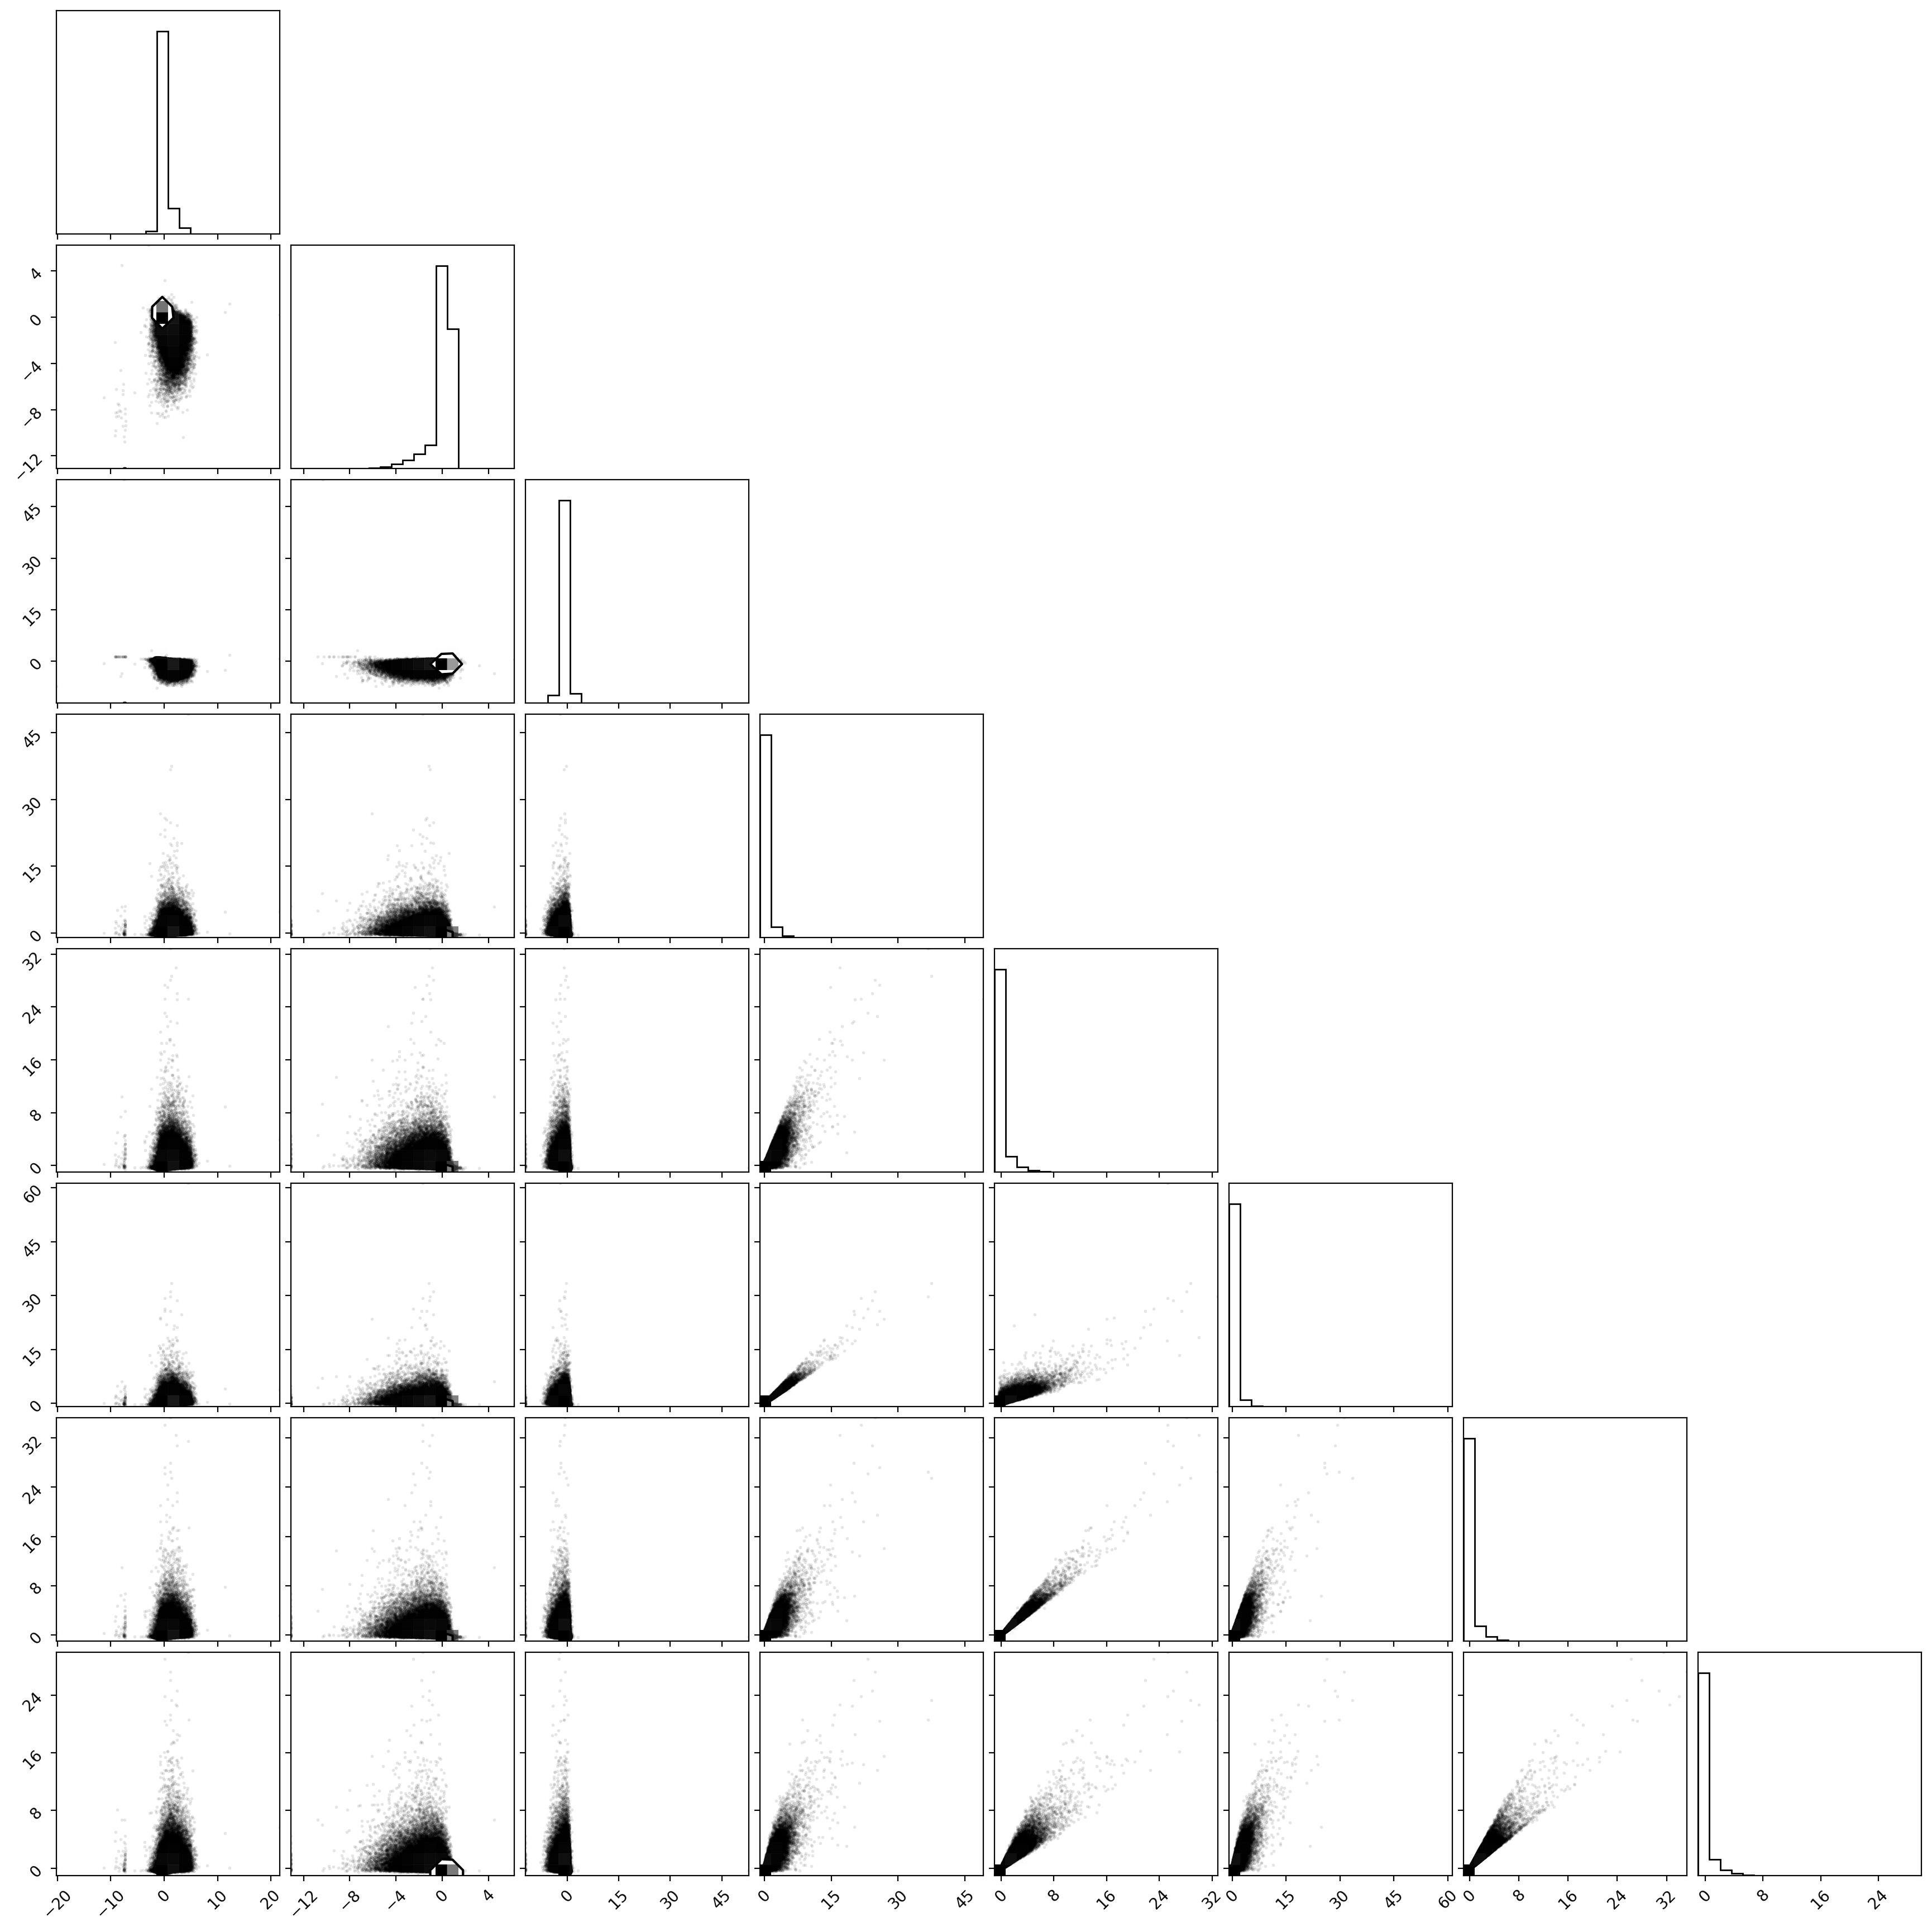

In [36]:
import corner

corner.corner(Xs, label=selected_feature_names)


# KMeans

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(Xs)

cluster_labels = kmeans.labels_

print("Cluster Labels:")
print(cluster_labels)


/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels:
[0 0 0 ... 0 0 1]


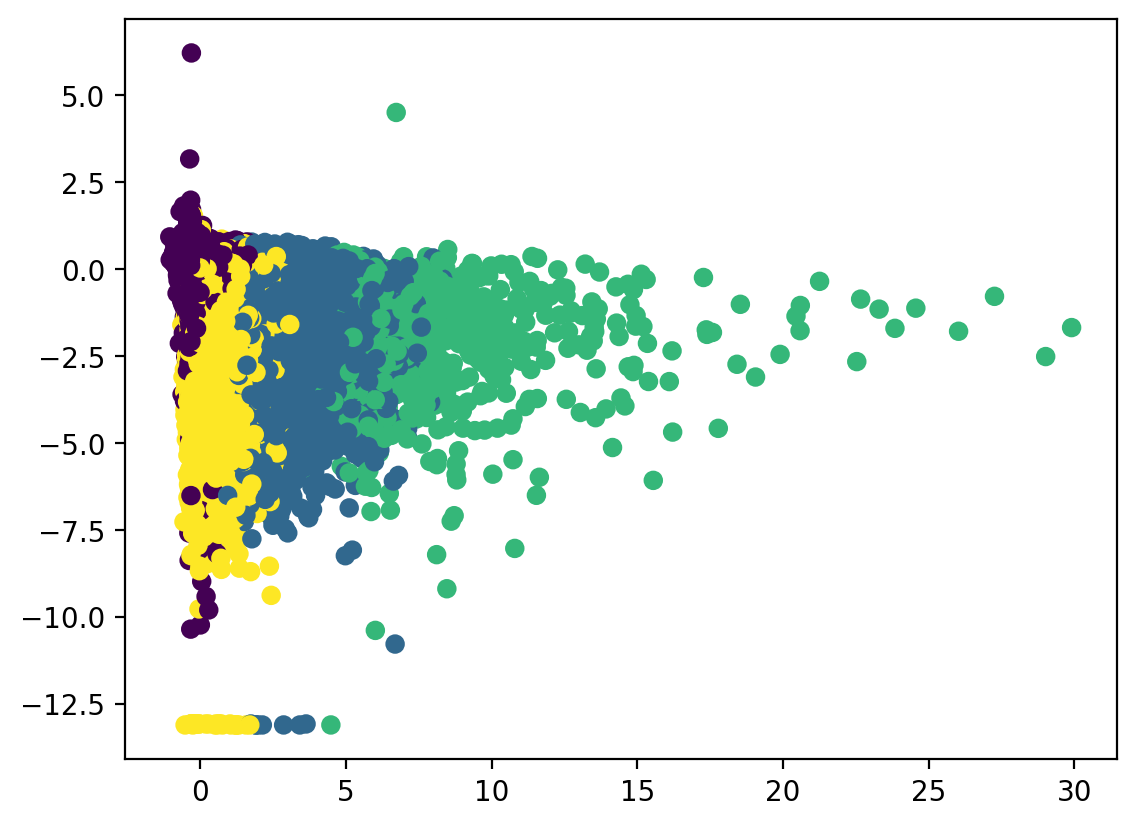

In [38]:
y_pred = kmeans.predict(Xs)

plt.scatter(Xs[:, 7], Xs[:, 1],
            c=y_pred, cmap='viridis');

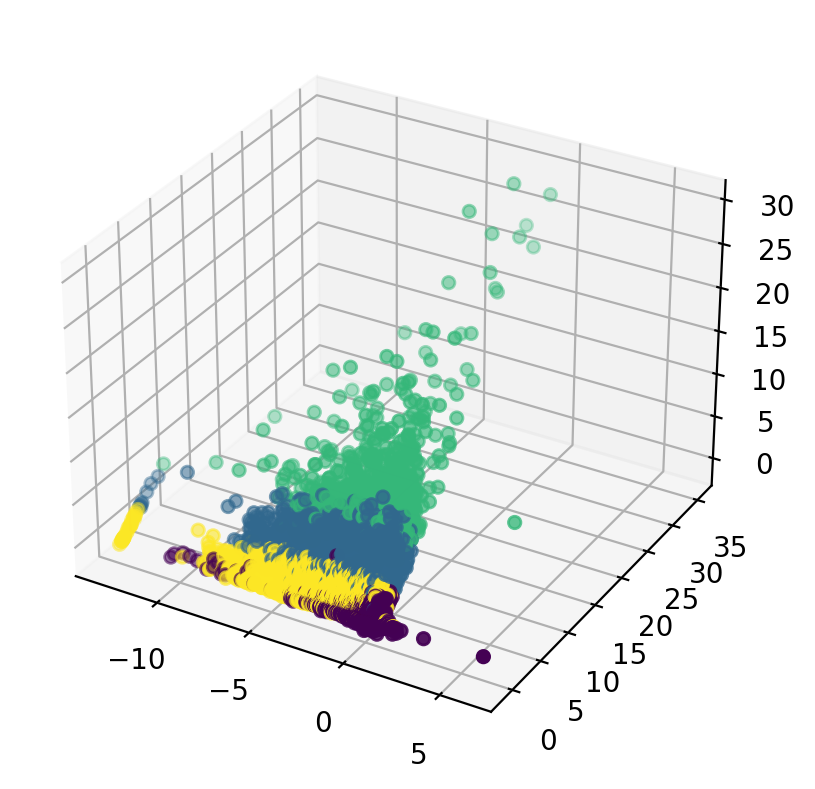

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xs[:, 1], Xs[:, 6], Xs[:, 7], c=y_pred, cmap='viridis')

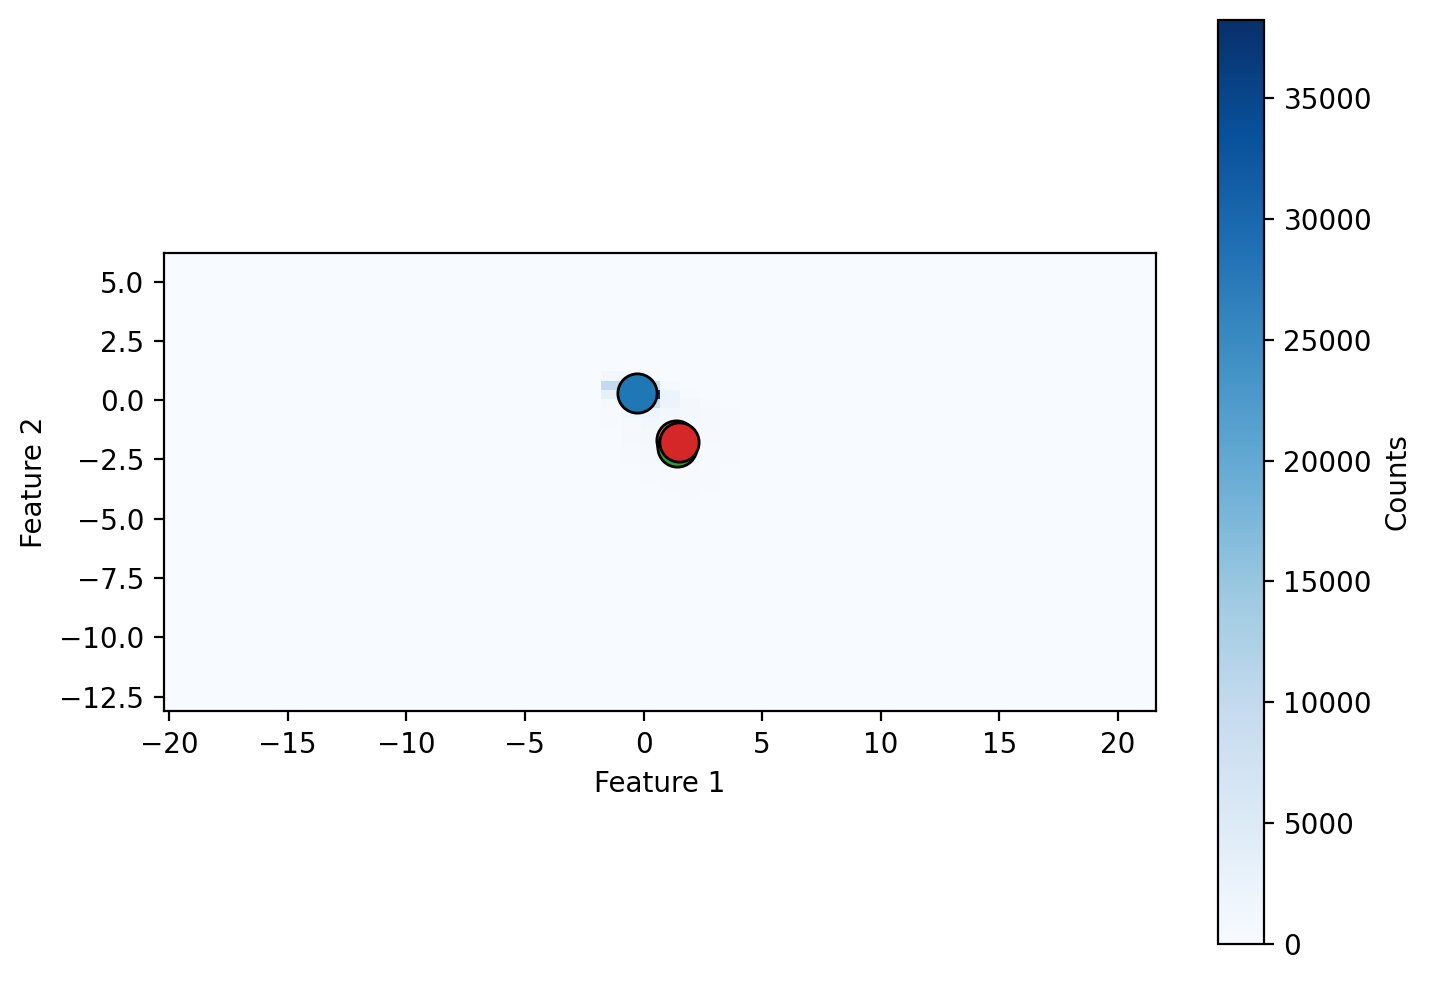

In [42]:
unique_labels = np.unique(cluster_labels)
cluster_centers = kmeans.cluster_centers_

# Calculate the histogram of cluster points
hist, xedges, yedges = np.histogram2d(Xs[:, 0], Xs[:, 1], bins=50)

# Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Blues')
plt.colorbar(label='Counts')

# Add scatter plot of cluster points
#for label in unique_labels:
#    cluster_points = Xs[cluster_labels == label]
#    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', alpha=0.7)

# Add scatter plot of cluster centers
for label, center in zip(unique_labels, cluster_centers):
    plt.scatter(center[0], center[1], marker='o', label=f'Cluster {label}', edgecolors='black', s=200)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

#plt.legend()
plt.show()

In [43]:
indices = []
for i in range(len(y)):
    if y[i]==1:
        indices+=[i]

count = 0
for i in indices:
    if cluster_labels[i] != 0:
        count+=1

print('Fraction of indentified electrons not in main cluster  = {:.4f}'.format(count/len(indices)))

Fraction of indentified electrons not in main cluster  = 0.0035


In [44]:
indices = []
for i in range(len(y)):
    if y[i]==0:
        indices+=[i]

count = 0
for i in indices:
    if cluster_labels[i] == 0:
        count+=1

print('Fraction of indentified non-electrons in main cluster  = {:.4f}'.format(count/len(indices)))

Fraction of indentified non-electrons in main cluster  = 0.3998


# MeanShift clustering

In [46]:
from sklearn.cluster import MeanShift

meanshift = MeanShift(bandwidth=3)
cluster_labels = meanshift.fit_predict(Xs)

# Create a mapping from cluster labels to binary labels (0 or 1)
cluster_mapping = {}
for cluster_label in np.unique(cluster_labels):
    cluster_data = y[cluster_labels == cluster_label]
    cluster_mapping[cluster_label] = np.argmax(np.bincount(cluster_data))

# Map cluster labels to binary labels
predicted_labels = np.array([cluster_mapping[label] for label in cluster_labels])

# Evaluate the accuracy of the predicted labels
accuracy = accuracy_score(y, predicted_labels)
print("Accuracy:", accuracy)

cluster_centers_ms = meanshift.cluster_centers_


Accuracy: 0.7741476923076923


number of estimated clusters : 153


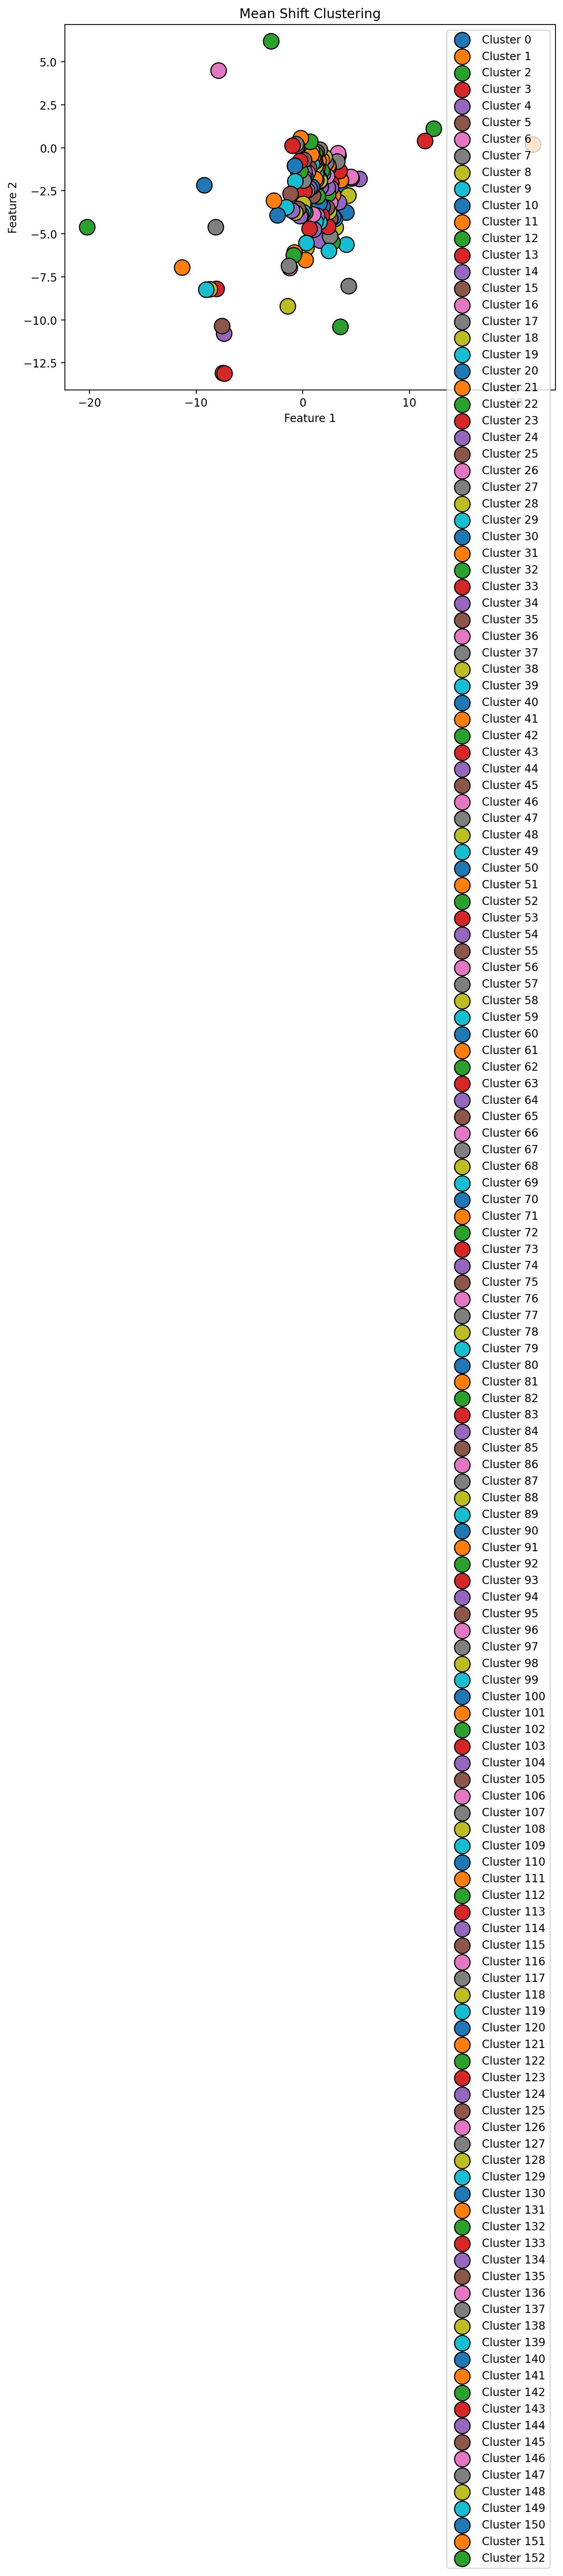

In [49]:
# Get unique cluster labels
labels_unique = np.unique(meanshift.labels_)
unique_labels = np.unique(cluster_labels)
n_clusters = len(labels_unique[labels_unique >= 0])
print("number of estimated clusters :", n_clusters)


# Plot the data points with different colors for each cluster
plt.figure(figsize=(8, 6))
# for label in unique_labels:
#     cluster_points = Xs[cluster_labels == label]
#     plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}')
    
# Add scatter plot of cluster centers
for label, center in zip(unique_labels, cluster_centers_ms):
    plt.scatter(center[0], center[1], marker='o', label=f'Cluster {label}', edgecolors='black', s=200)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Mean Shift Clustering')
plt.legend()
plt.show()

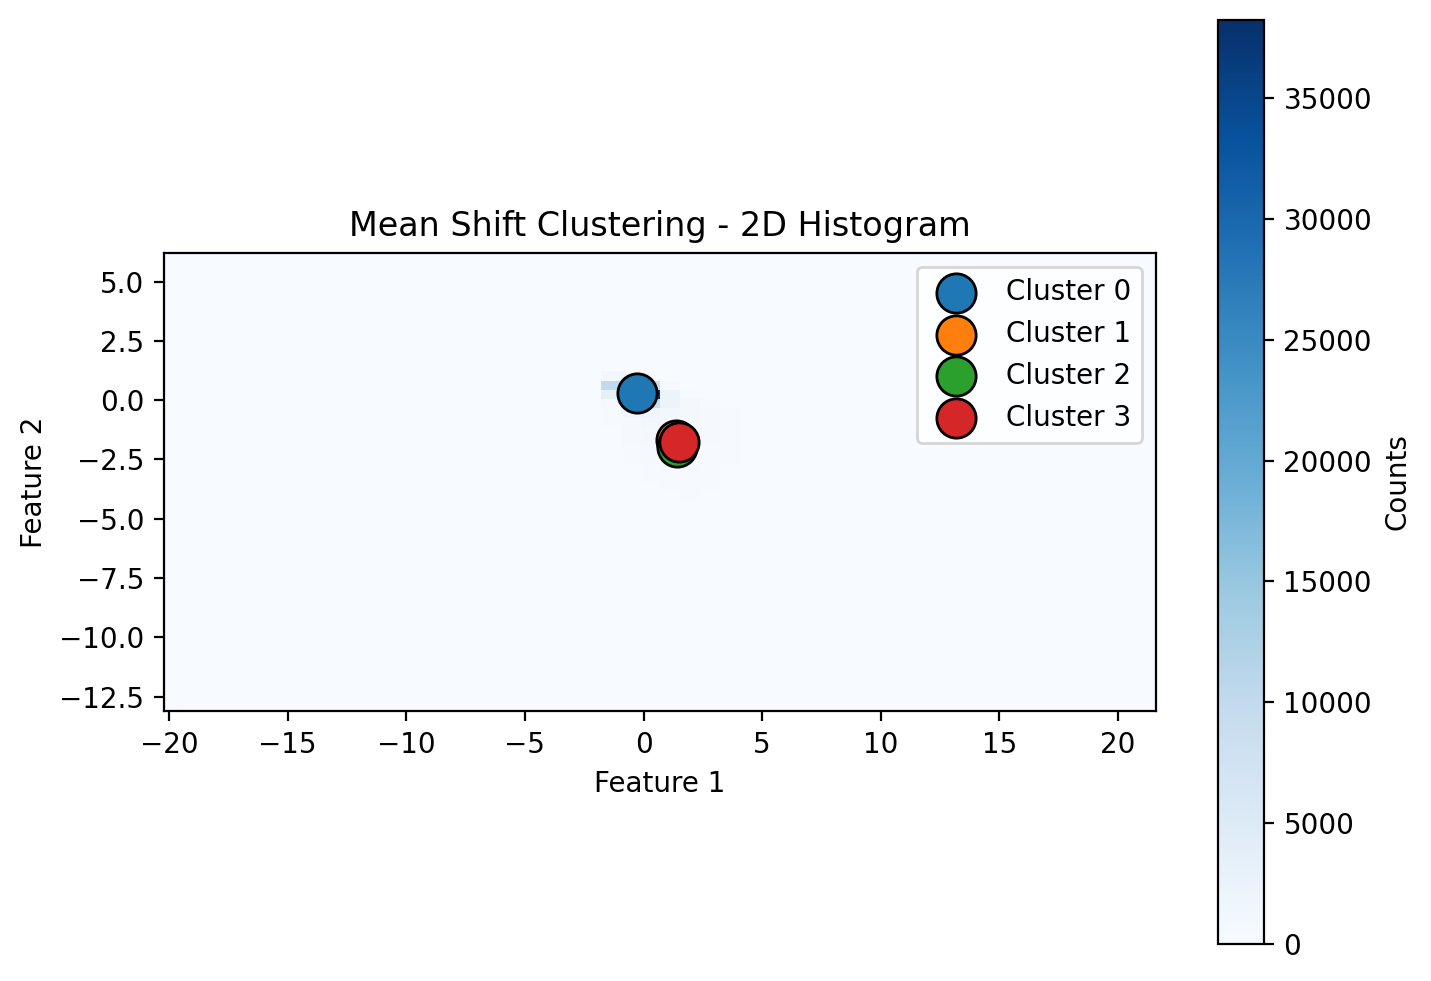

In [52]:

# Calculate the histogram of cluster points
hist, xedges, yedges = np.histogram2d(Xs[:, 0], Xs[:, 1], bins=50)

# Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Blues')
plt.colorbar(label='Counts')

# Add scatter plot of cluster points
# for label in unique_labels:
#     cluster_points = Xs[cluster_labels == label]
#     plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', alpha=0.7)
    
# Add scatter plot of cluster centers
for label, center in zip(unique_labels, cluster_centers):
    plt.scatter(center[0], center[1], marker='o', label=f'Cluster {label}', edgecolors='black', s=200)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Mean Shift Clustering - 2D Histogram')
plt.legend()
plt.show()

In [53]:
indices = []
for i in range(len(y)):
    if y[i]==1:
        indices+=[i]

count = 0
for i in indices:
    if cluster_labels[i] != 0:
        count+=1

print('Fraction of indentified electrons not in main cluster  = {:.4f}'.format(count/len(indices)))

Fraction of indentified electrons not in main cluster  = 0.0002


In [54]:
indices = []
for i in range(len(y)):
    if y[i]==0:
        indices+=[i]

count = 0
for i in indices:
    if cluster_labels[i] == 0:
        count+=1

print('Fraction of indentified non-electrons in main cluster  = {:.4f}'.format(count/len(indices)))

Fraction of indentified non-electrons in main cluster  = 0.8945


# Using PCA

Text(0, 0.5, 'Eigenvalue 2')

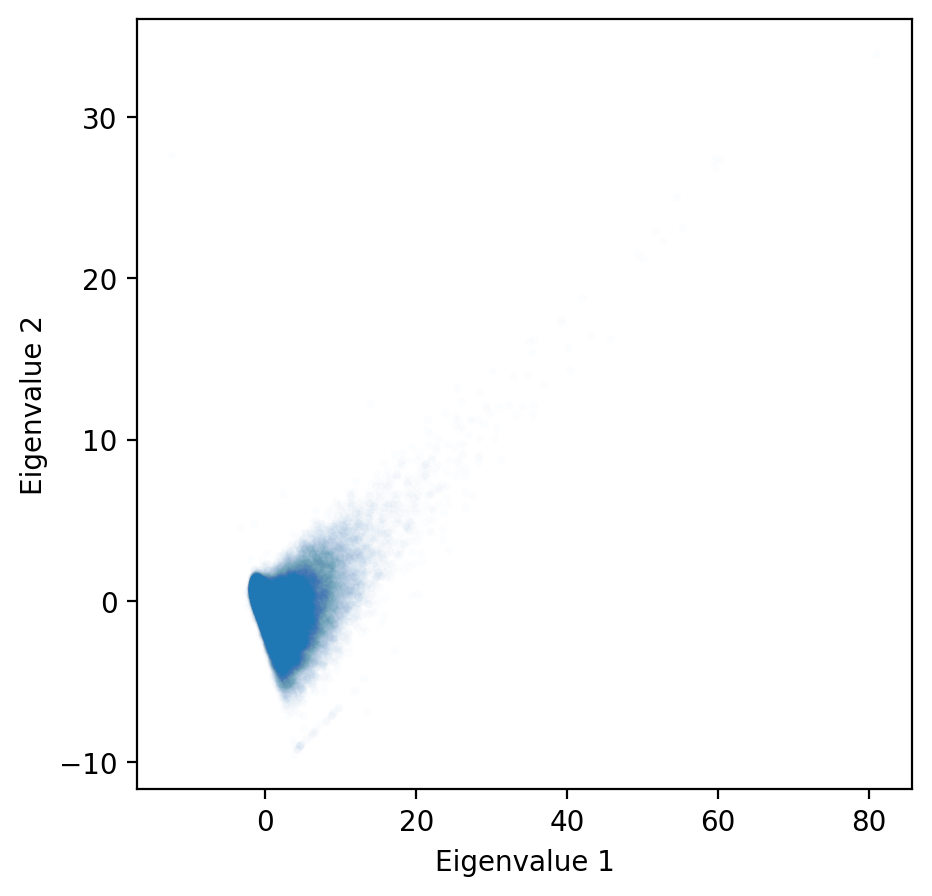

In [6]:
# Project onto 2 axes with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 components
pca.fit(Xs) # Do the fitting


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()


X_reduced = pca.transform(Xs)

ax.scatter(X_reduced[:,0], X_reduced[:,1], 
            marker=".", color='C0', 
            alpha=0.01, edgecolors='None')
ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

/Users/user1/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


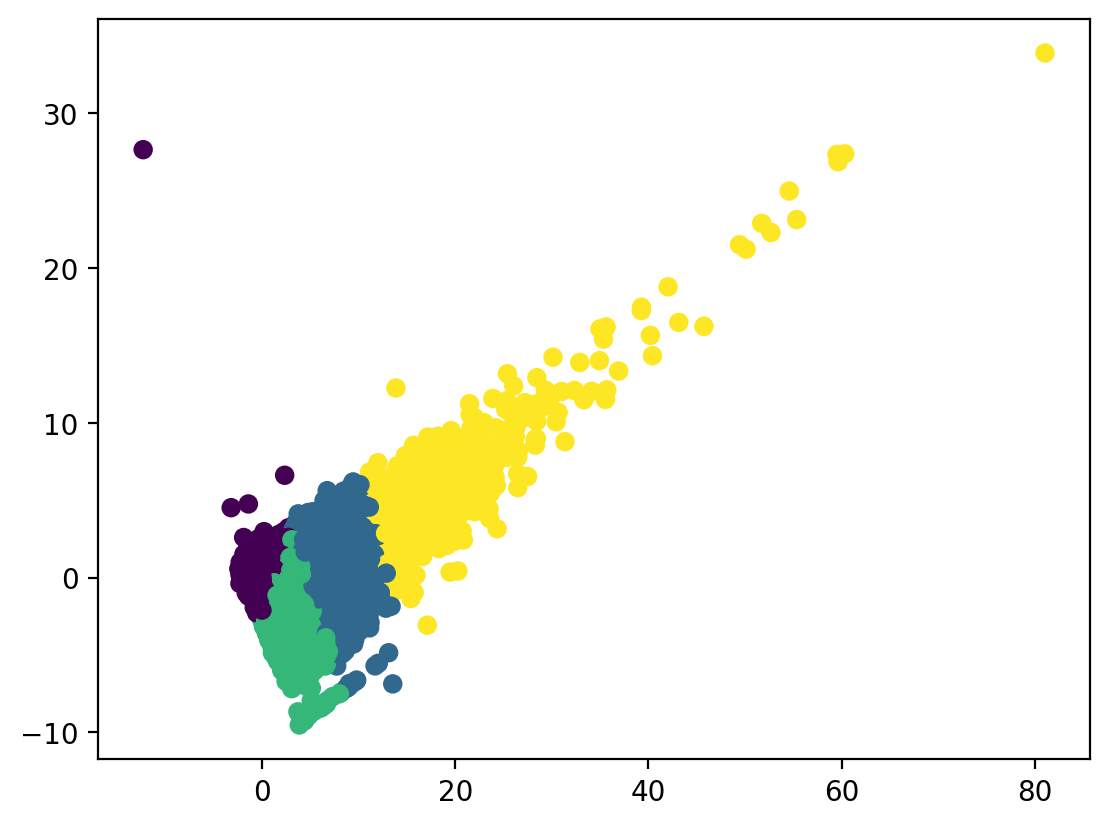

In [7]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=4, random_state=42)

kmeans2.fit(X_reduced)

cluster_labels = kmeans2.labels_

y_pred2 = kmeans2.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_pred2, cmap='viridis');

In [8]:
indices = []
for i in range(len(y)):
    if y[i]==1:
        indices+=[i]

count = 0
for i in indices:
    if cluster_labels[i] != 0:
        count+=1

print('Fraction of indentified electrons not in main cluster  = {:.4f}'.format(count/len(indices)))

Fraction of indentified electrons not in main cluster  = 0.0038


In [9]:
indices = []
for i in range(len(y)):
    if y[i]==0:
        indices+=[i]

count = 0
for i in indices:
    if cluster_labels[i] == 0:
        count+=1

print('Fraction of indentified non-electrons in main cluster  = {:.4f}'.format(count/len(indices)))

Fraction of indentified non-electrons in main cluster  = 0.3998


We devided our data into 4 clusters (can be seen from the projections of the different features to 2D that the clusters matchings are okay).

Now we checked wether all the known electron particles are in the same cluster, and we see that only 0.3% of them are in a different cluster (not in cluster lables '0'). So we conclude our algorithm works pretty well.

But! We see that also around 40% of the non-electrons are also in the main cluster. We're not sure what to conclude from this, besides that the clustering method here doesn't work very well (at least without performing PCA).

We tried another method with MeanShift but that methods devide our data to many clusters so we'll keep working with Kmeans.

Using PCA - we got almost exacly the same result as with Kmeans - no improvement.

# Predicting using our model

In [299]:
y_pred_t = model_tf.predict(Xs_t1)

5021/5021 [==============================] - 6s 1ms/step


In [303]:
print(np.round(y_pred_t.flatten()))

[1. 1. 1. ... 0. 0. 1.]


In [307]:
only_electrons = X_t[np.round(y_pred_t.flatten())==1]
only_electrons.shape


(131770, 160)

In [310]:
X_t2 = only_electrons[selected_feature_names_reg]
X_t2.shape

(131770, 12)

In [311]:
sc = StandardScaler()
Xs_t2 = sc.fit_transform(X_t2)

In [312]:
y_pred_t_reg = model_tf_reg.predict(Xs_t2)

4118/4118 [==============================] - 5s 1ms/step


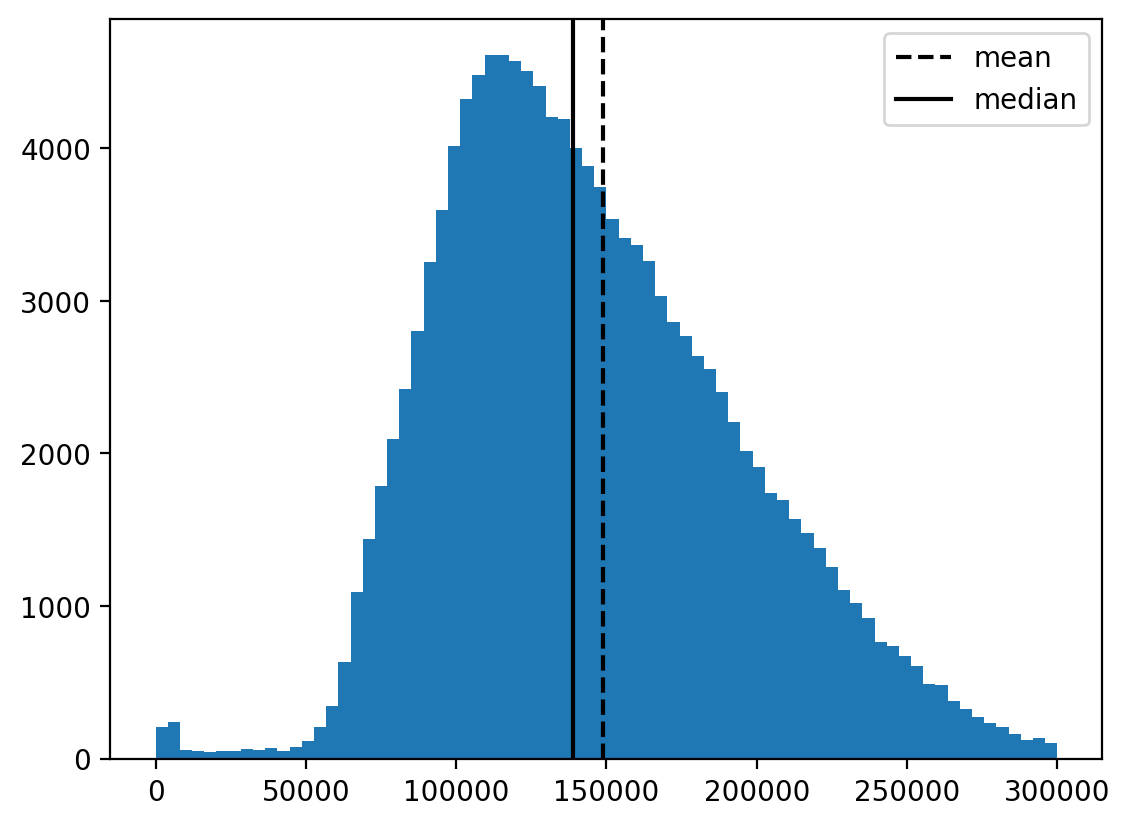

In [313]:
_ = plt.hist(y_pred_t_reg, bins=np.linspace(0,300000,75))
plt.axvline(np.mean(y_pred_t_reg), color='black', ls='--', label='mean')
plt.axvline(np.median(y_pred_t_reg), color='black', label='median')
plt.legend()

In [318]:
X_t3 = X_t[selected_feature_names_clust]
X_t3.shape

(160651, 8)

In [319]:
Xs_t3 = sc.fit_transform(X_t3)
y_pred_t_clust = kmeans.predict(Xs_t3)

In [321]:
indices = []
for i in range(len(y_pred_t)):
    if np.round(y_pred_t[i])==1:
        indices+=[i]

count = 0
for i in indices:
    if cluster_labels[i] != 0:
        count+=1

print('Fraction of indentified electrons not in main cluster  = {:.4f}'.format(count/len(indices)))

Fraction of indentified electrons not in main cluster  = 0.1545


Now we've tested our test dataset using our prefereable models from previous sections. For each of the models we had to change the data variables to match the ones the model expect, and scale our data.

First, we classified the data to electrons and non-electrons using the Keras model from exercise 1. Second, we kept only the predicted electrons and used the Keras model from exercise 2 to predict their energy. From the histogram plot above we see a very similar distribution of energies as was given in the training data. Then we used the KMeans clustering from exercise 3 to devide our data to the different clusters, and found that the result is not as unanimous as was in the training set, where almost all the electrons were seperated in one cluster.